#Στοιχεία ομάδας


###Αριθμός ομάδας: 43 
Datasets: S05, B05

###Μέλη:
Επίθετο | Όνομα | Α.Μ.
---|---|---
Κορακοβούνης|Δημήτριος|03116692
Αναγνωστόπουλος|Θεόδωρος|03116066
||03115087



#Μικρό Dataset(S05)

###Βασικές πληροφορίες

1. Το dataset HCC Survival αποκτήθηκε σε πανεπιστημιακό νοσοκομείο της Πορτογαλίας και περιλαμβάνει πολλά δημογραφικά στοιχεία, παράγοντες κινδύνου, εργαστηριακά και συνολικά χαρακτηριστικά επιβίωσης 165 πραγματικών ασθενών που διαγνώστηκαν με HCC(hepatocellular carcinoma - ηπατοκυτταρικό καρκίνωμα).

Φορτώνουμε το Dataset ώστε να μπορούύμε να το επεξεργαστούμε

In [ ]:
#Load up-todate libraries

!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install --upgrade matplotlib
!pip install -U imbalanced-learn

In [ ]:
#data var contains the dataset. Each column represents a patient. Each row represents a feature
#Last row represents the class
import numpy as np
import pandas

inp_file = pandas.read_csv('hcc-data.txt', header = None).to_numpy()

data = inp_file[:,:-1]

labels = inp_file[:,-1]


print(inp_file)

[[1 '0' 1 ... '?' '?' 1]
 [0 '?' 0 ... '?' '?' 1]
 [1 '0' 1 ... '6' '16' 1]
 ...
 [1 '0' 1 ... '?' '?' 1]
 [1 '0' 1 ... '?' '?' 0]
 [1 '1' 1 ... '?' '?' 0]]


2. Με την κλήση της data.shape μπορούμε να δούμε τις διαστάσεις του πίνακα των δεδομένων. Η κάθε σειρά περιέχει τα δεδομένα του αντίστοιχου ασθενή, ενώ η κάθε στήλη περιγράφει ένα χαρακτηριστικό. Όπως βλέπουμε, έχουμε 165 δείγματα ασθενών, ενώ μας δίνονται και 49 χαρακτηριστικά για κάθε έναν καθώς και η κλάση στην οποία ανήκει(σύνολο 50 στήλες), που συμφωνεί με τις πληροφορίες που μας δίνονται από το UCI. Σύμφωνα με τις πληροφορίες στο UCI δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

3. Στο αρχείο hcc-data.txt που μας δίνεται δεν υπάρχουν ούτε επικεφαλίδες, ούτε αρίθμιση γραμμών.

4. Στο hcc-data.txt δεν παρέχονται ετικέτες των κλάσεων αλλά από το UCI έχουμε ότι οι κλάσεις αφορούν την επιβίωση του ασθενούς σε διάστημα ενός χρόνου, ενώ η τιμή που δίνεται είναι δυαδική με ένα(1) - επιβίωσε, μηδέν(0) - απεβίωσε, και βρίσκεται στην κολώνα 50.

5. Για να πάρουμε τα δεδομένα στην μορφή που τα έχουμε στην μεταβλητή data, ανοίξαμε το αρχείο με την συνάρτηση read_csv της pandas και βάλαμε την τελευταία στήλη στην μεταβλητή labels όπου και κρατάμε την κλάση στην οποία ανήκει ο ασθενής

In [ ]:
c = 0

for i in data:
  if '?' in i:
    c += 1

perc = c/len(data)

print(c)
print(perc)


157
0.9515151515151515


6. Από τον παραπάνω κώδικα έχουμε ότι υπάρχουν 157 δείγματα με απουσιάζουσες τιμές που αποτελούν το 95.15% των συνολικών δειγμάτων. Τα νούμερα συμφωνούν και με τις τιμές που δίνονται απο το UCI.


In [ ]:
c = 0

for i in labels:
    c += i

perc = c/len(labels)

print(c)
print(perc)

102
0.6181818181818182


7. Στο dataset έχουμε 2 κλάσεις. Τρέχοντας τον παραπάνω κώδικα βλέπουμε ότι το 61.81% των δειγμάτων ανήκουν στην κλάση "επιβίωσε", ενώ το 38.18%, στην κλάση "απεβίωσε".
Το dataset λοιπόν είναι (οριακά) μη ισορροπημένο.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

features = np.where(data == '?',np.NaN,data)
tmp = []
for i in labels:
  tmp.append(int(i))
labels = tmp           

imp=SimpleImputer(missing_values=np.NaN,strategy='mean')

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)
train = imp.fit_transform(train)
test = imp.transform(test)

8. Με το παραπάνω κελί κώδικα χωρίζουμε το dataset μας σε train και test datasets, με την χρήση της συνάρτησης train_test_split, όπου το 20% του αρχικού μας dataset θα αποτελεί το test. Στο σύνολο των δεδομένων είχαμε απουσιάζουσες τιμές. Επειδή το ποσοστό αυτών είναι μεγάλο, η αφαίρεση των αντίστοιχων δειγμάτων ή κολώνων θα αφαιρούσε και πολύ πληροφορία, κάναμε χρήση του SimpleImputer και αντικαταστίσαμε αυτές τις τιμές με τον μέσο όρο των τιμών του αντίστοιχου feature του train set, τόσο στο train όσο και στο test dataset.

### Ταξινόνηση

Δεδομένου ότι το dataset δεν είναι ισορροπημένο αποφασίζουμε κατά την διάρκεια του preproccessing να εξισορροπίσουμε τα δεδομένα. Χρησιμοποιούμε τόόσο την τεχνική του undersampling όσο και αυτή του oversampling και κρατάμε τα 3 διαφορετικά datasets (τα 2 προαναφερθέντα και το αρχικό) για μελέτη των αποτελεσμάτων κάάθε τεχνικής

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Initializing train_set - preproccessing Over/Under samppling

ros_over = RandomOverSampler(random_state=0)
over_train, over_train_labels = ros_over.fit_sample(train,train_labels)

Στο σημείο αυτό αρχικοποιούμε τους dummy classifiers. Επειδή χρησιμοποιούμε 3 διαφορετικά datasets, για κάθε classifier θα χρησιμοποιήσουμε ισάριθμα δίκτυα. Κάάθε ένα θα εκπαιδευτεί σε διαφορετικό dataset και έτσι θα μπορέσουμε να συγκρίνουμε τα αποτελέσματα των τεχνικών του oversampling/undersampling.

In [ ]:
#Classifiers (Dummy - GNB - Knn)

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

gnb = GaussianNB()

knn = KNeighborsClassifier()


Αρχικοποιούμε 3 GNB classifiers, έναν για κάθε dataset.

Παρακάτω εκπαιδεύουμε τους knn classifiers. Χρησιμοποιούμε την τεχνική του 10-fold cross-validation. Επιλέγουμε 2 ταξινομιτές για κάθε dataset ανάλογα τον τύπο του score: f1_micro, f1_macro


Η συνάρτηση run_classfr δέχεται σαν όρισμα έναν classifier, δεδομένα train και test, και εκπεδαίευει τον ταξινομητή, υπολογίζει και επιστρέφει τον χρόνο εκπαίδευσής του, το accuracy στο test set, και τα predictions που υπολογίζει ο ταξινομητής.

In [ ]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


def run_classfr(classifier, train, train_labels, test, test_labels, f1_micro, f1_macro):
  start = time.time()
  model = classifier.fit(train,train_labels)
  duration = time.time() - start
  pred = classifier.predict(test)
  print_results(pred, duration, f1_micro, f1_macro)

def print_results(pred, duration, f1_micro, f1_macro):
  plot_confusion_matrix(confusion_matrix(test_labels,pred),['Dead', 'Alive'])
  tmp_micro = f1_score(test_labels,pred,average='micro')
  tmp_macro = f1_score(test_labels,pred,average='macro')
  f1_micro.append(f1_score(test_labels,pred,average='micro'))
  f1_macro.append(f1_score(test_labels,pred,average='macro'))
  print('F1_micro: ', tmp_micro)
  print('F1_macro: ', tmp_macro)
  print('Precision score: ',precision_score(test_labels, pred, average='micro'))
  print('Recall score: ',recall_score(test_labels, pred, average='micro'))
  print("Accuracy score: ", accuracy_score(test_labels, pred))
  print('Συνολικός Χρόνος: ',duration)

Η συνάρτηση plot_scores εκτυπώνει ένα γράφημα με τα score του κάθε classifier για το αντίστοιχο score_type.  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
   
    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()


    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_scores(x_axis,y_axis,ttl = ''):
  plt.figure(figsize=(1.2*len(x_axis)+1, 3.5 + 0.1*len(x_axis)))
  plt.xlabel('Classifier',fontsize = 15)
  title = ttl+' Score'
  plt.ylabel(title,fontsize = 15)
  plt.ylim(0,1)
  plt.bar(x_axis,y_axis,width = 0.5, color = 'blue')
  plt.show()


Με την συνάρτηση output εκτυπώνουμε τα ζητούμενα της άσκησης που περιλαμβάνουν για κάθε classifier και κάθε dataset αυτού:

* Τον χρόνο εκπαίδευσής του
* Τον confusion matrix
* Το classification report

<br> 
Και για το σύνολο των classifier, για κάθε ένα απόό τα 3 dataset (original, oversampled, undersampled) 2 γραφήμματα:

* Γράφημα των classifiers με το f1 micro score τους
* Γράφημα των classifiers με το f1 macro score τους

In [ ]:
#initialize values

f1_micro = []
f1_macro = []

dc_uniform:



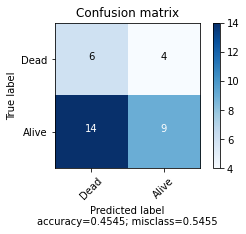

F1_micro:  0.45454545454545453
F1_macro:  0.45
Precision score:  0.45454545454545453
Recall score:  0.45454545454545453
Accuracy score:  0.45454545454545453
Συνολικός Χρόνος:  0.00034332275390625
______________________________________




dc_constant_0:



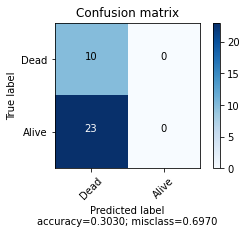

F1_micro:  0.30303030303030304
F1_macro:  0.23255813953488375
Precision score:  0.30303030303030304
Recall score:  0.30303030303030304
Accuracy score:  0.30303030303030304
Συνολικός Χρόνος:  0.00047326087951660156
______________________________________




dc_constant_1:



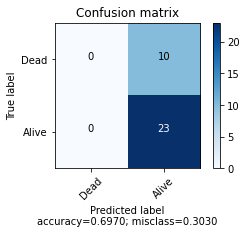

F1_micro:  0.696969696969697
F1_macro:  0.41071428571428575
Precision score:  0.696969696969697
Recall score:  0.696969696969697
Accuracy score:  0.696969696969697
Συνολικός Χρόνος:  0.00030994415283203125
______________________________________




dc_most_frequent:



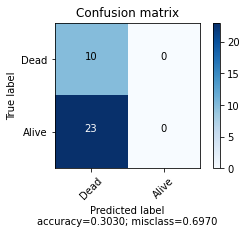

F1_micro:  0.30303030303030304
F1_macro:  0.23255813953488375
Precision score:  0.30303030303030304
Recall score:  0.30303030303030304
Accuracy score:  0.30303030303030304
Συνολικός Χρόνος:  0.00023555755615234375
______________________________________




dc_stratified:



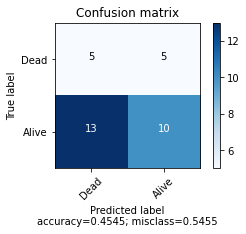

F1_micro:  0.45454545454545453
F1_macro:  0.44172932330827064
Precision score:  0.45454545454545453
Recall score:  0.45454545454545453
Accuracy score:  0.45454545454545453
Συνολικός Χρόνος:  0.00035452842712402344


In [ ]:
print('dc_uniform:\n')
run_classfr(dc_uniform, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)
print('______________________________________\n\n\n\n')

print('dc_constant_0:\n')
run_classfr(dc_constant_0, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)
print('______________________________________\n\n\n\n')

print('dc_constant_1:\n')
run_classfr(dc_constant_1, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)
print('______________________________________\n\n\n\n')

print('dc_most_frequent:\n')
run_classfr(dc_most_frequent, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)
print('______________________________________\n\n\n\n')

print('dc_stratified:\n')
run_classfr(dc_stratified, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)


GNB:



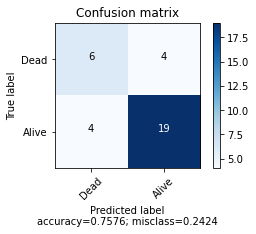

F1_micro:  0.7575757575757576
F1_macro:  0.7130434782608696
Precision score:  0.7575757575757576
Recall score:  0.7575757575757576
Accuracy score:  0.7575757575757576
Συνολικός Χρόνος:  0.0019614696502685547


In [ ]:
print('GNB:\n')
run_classfr(gnb, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)

KNN:



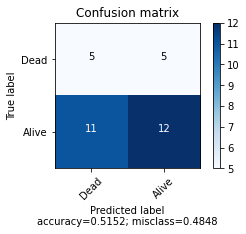

F1_micro:  0.5151515151515151
F1_macro:  0.49230769230769234
Precision score:  0.5151515151515151
Recall score:  0.5151515151515151
Accuracy score:  0.5151515151515151
Συνολικός Χρόνος:  0.0014057159423828125


In [ ]:
print('KNN:\n')
run_classfr(knn, over_train, over_train_labels, test, test_labels, f1_micro, f1_macro)

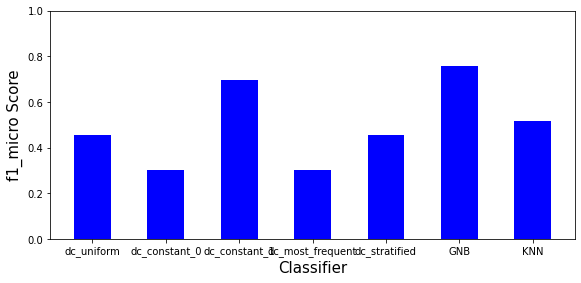

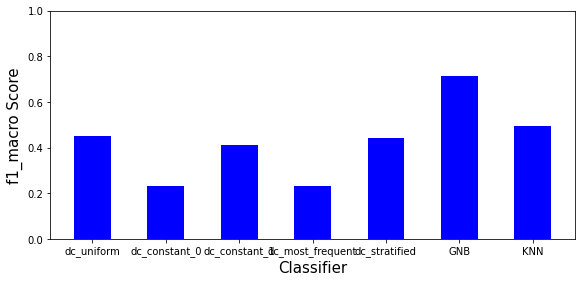

In [ ]:
clf = ['dc_uniform','dc_constant_0','dc_constant_1','dc_most_frequent','dc_stratified','GNB','KNN']

plot_scores(clf,f1_micro,'f1_micro')
plot_scores(clf,f1_macro,'f1_macro')

#### Συμπέρασμα:
Από τα παραπάνω βλέπουμε το αναμενόμενο, δηλαδή ότι οι dummy classifiers αποδίδουν λιγότερο σε κάθε score metric(πλην του dc_constant_1 f1_micro). Αυτό συμβαίνει καθώς δεν χρησιμοποιούν κάποια τεχνική συσχέέτισης στα features (τα αγνοούν πλήρως).Το υψηλό score του dc_constant_1 οφείλεται στο διαχωρισμό του dataset σε train και test και προέκυψε από τύχη τόσο μεγάλο. O gnb έχει ένα αυξημένο ποσοστό επιτυχία σε κάθε score metric (μεγαλύτερο απ' όλους τους classifiers) καθώς χρησιμοποιεί τις συσχετίσεις των χαρακτηριστικών χωρίς όμως να πετυχαίνει και εκπληκτικά αποτελέσματα. Τέλος ο default KNN (5NN) δείχνει να έχει μεγαλύτερο ποσοστό από τους dummy (πλην του dc_constant_1 f1_micro) αλλά μικρότερο από αυτό του gnb. Αυτό μας δείχνει την χαόδη φύύση (την αλληλεπικάάλυψη των δεδομέένων στο χώώρο των features) του dataset. Αυτός είναι και ο λόγος που και ο gnb πετυχαίνει αυτό το χαμηλό σχετικά ποσοστό

###Βελτιστοποίηση

In [ ]:
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

n_components = range(5,49,9)
selector = VarianceThreshold()
scaler = StandardScaler()

acc = []
f1_micro = []
f1_macro = []

In [ ]:
def best_parameters(steps, param, cv, score_type, train, train_labels, test, test_labels):
  pipe = Pipeline(steps = steps, memory = 'tmp')
  estimator = GridSearchCV(pipe, param, cv = cv, scoring = score_type, n_jobs =-1)   
  start_time = time.time()
  estimator.fit(train, train_labels)
  preds = estimator.best_estimator_.predict(test)
  print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
  print(classification_report(test_labels, preds))
  print(estimator.best_estimator_)
  print(estimator.best_params_)
  f1_micro.append(f1_score(test_labels,preds,average='micro'))
  f1_macro.append(f1_score(test_labels,preds,average='macro'))
  plot_confusion_matrix(confusion_matrix(test_labels,preds), ['Dead','Alive'])
  print("Precision score is ", precision_score(test_labels, preds, average=None))
  print("Recall  score is ", recall_score(test_labels, preds, average=None))
  acc.append(accuracy_score(test_labels, preds))
  print("Accuracy score is ", acc[-1])

####Score F1_micro

Συνολικός χρόνος fit και predict: 2.1270411014556885 seconds
              precision    recall  f1-score   support

           0       0.22      0.20      0.21        10
           1       0.67      0.70      0.68        23

    accuracy                           0.55        33
   macro avg       0.44      0.45      0.45        33
weighted avg       0.53      0.55      0.54        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=14)),
                ('dummy', DummyClassifier(strategy='uniform'))])
{'pca__n_components': 14}


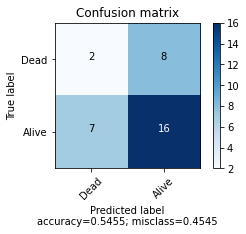

Precision score is  [0.22222222 0.66666667]
Recall  score is  [0.2        0.69565217]
Accuracy score is  0.5454545454545454
______________________________________




Συνολικός χρόνος fit και predict: 0.5003774166107178 seconds
              precision    recall  f1-score   support

           0       0.30      1.00      0.47        10
           1       0.00      0.00      0.00        23

    accuracy                           0.30        33
   macro avg       0.15      0.50      0.23        33
weighted avg       0.09      0.30      0.14        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('dummy', DummyClassifier(constant=0, strategy='constant'))])
{'pca__n_components': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


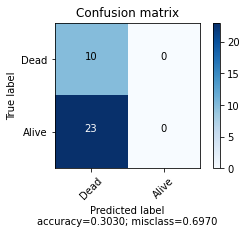

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is  [0.3030303 0.       ]
Recall  score is  [1. 0.]
Accuracy score is  0.30303030303030304
______________________________________




Συνολικός χρόνος fit και predict: 0.49866557121276855 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.70      1.00      0.82        23

    accuracy                           0.70        33
   macro avg       0.35      0.50      0.41        33
weighted avg       0.49      0.70      0.57        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('dummy', DummyClassifier(constant=1, strategy='constant'))])
{'pca__n_components': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


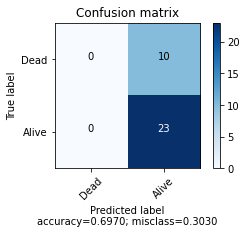

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is  [0.        0.6969697]
Recall  score is  [0. 1.]
Accuracy score is  0.696969696969697
______________________________________




Συνολικός χρόνος fit και predict: 0.4895939826965332 seconds
              precision    recall  f1-score   support

           0       0.30      1.00      0.47        10
           1       0.00      0.00      0.00        23

    accuracy                           0.30        33
   macro avg       0.15      0.50      0.23        33
weighted avg       0.09      0.30      0.14        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('dummy', DummyClassifier(strategy='most_frequent'))])
{'pca__n_components': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


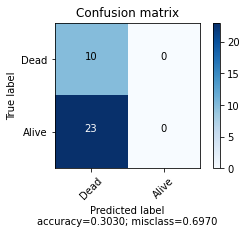

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is  [0.3030303 0.       ]
Recall  score is  [1. 0.]
Accuracy score is  0.30303030303030304
______________________________________




Συνολικός χρόνος fit και predict: 0.5055465698242188 seconds
              precision    recall  f1-score   support

           0       0.15      0.20      0.17        10
           1       0.60      0.52      0.56        23

    accuracy                           0.42        33
   macro avg       0.38      0.36      0.37        33
weighted avg       0.46      0.42      0.44        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=23)),
                ('dummy', DummyClassifier(strategy='stratified'))])
{'pca__n_components': 23}


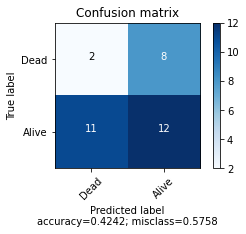

Precision score is  [0.15384615 0.6       ]
Recall  score is  [0.2        0.52173913]
Accuracy score is  0.42424242424242425


In [ ]:
pca = PCA()
ros = RandomOverSampler()

grid_params = {
    'pca__n_components': n_components, 
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_uniform)]

best_parameters(steps,grid_params,10,'f1_micro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_constant_0)]

best_parameters(steps,grid_params,10,'f1_micro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_constant_1)]

best_parameters(steps,grid_params,10,'f1_micro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_most_frequent)]

best_parameters(steps,grid_params,10,'f1_micro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_stratified)]

best_parameters(steps,grid_params,10,'f1_micro',over_train,over_train_labels,test,test_labels)

Συνολικός χρόνος fit και predict: 1.880995512008667 seconds
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.87      0.87      0.87        23

    accuracy                           0.82        33
   macro avg       0.78      0.78      0.78        33
weighted avg       0.82      0.82      0.82        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('gnb', GaussianNB())])
{'gnb__var_smoothing': 1e-09, 'pca__n_components': 5}


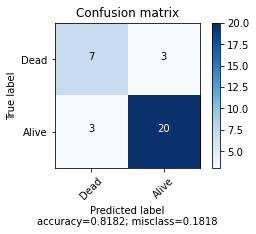

Precision score is  [0.7        0.86956522]
Recall  score is  [0.7        0.86956522]
Accuracy score is  0.8181818181818182


In [ ]:
smooth = [1e-9,1e-6,1e-3]
pca = PCA()
clf = GaussianNB()
ros = RandomOverSampler()

grid_params = {
    'pca__n_components': n_components,
    'gnb__var_smoothing': smooth
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)]

best_parameters(steps,grid_params,10,'f1_micro',train,train_labels,test,test_labels)

Συνολικός χρόνος fit και predict: 118.01942229270935 seconds
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.79      1.00      0.88        23

    accuracy                           0.82        33
   macro avg       0.90      0.70      0.73        33
weighted avg       0.86      0.82      0.79        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=32)),
                ('kNN',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=7))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 7, 'kNN__weights': 'uniform', 'pca__n_components': 32}


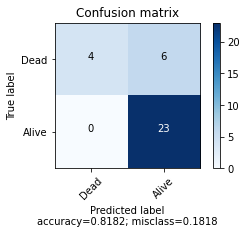

Precision score is  [1.         0.79310345]
Recall  score is  [0.4 1. ]
Accuracy score is  0.8181818181818182


In [ ]:
k = [1, 3, 5, 7, 9]
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)
ros = RandomOverSampler()
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','minkowski']

grid_params = {
    'pca__n_components': n_components,
    'kNN__n_neighbors': k,
    'kNN__weights': weights,
    'kNN__metric': metric
}

steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)]

best_parameters(steps,grid_params,10,'f1_micro',train,train_labels,test,test_labels)

####Score F1_macro

Συνολικός χρόνος fit και predict: 1.7677223682403564 seconds
              precision    recall  f1-score   support

           0       0.31      0.50      0.38        10
           1       0.71      0.52      0.60        23

    accuracy                           0.52        33
   macro avg       0.51      0.51      0.49        33
weighted avg       0.59      0.52      0.53        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=23)),
                ('dummy', DummyClassifier(strategy='uniform'))])
{'pca__n_components': 23}


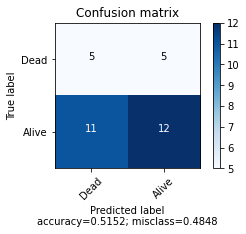

Precision score is  [0.3125     0.70588235]
Recall  score is  [0.5        0.52173913]
Accuracy score is  0.5151515151515151
______________________________________




Συνολικός χρόνος fit και predict: 0.48444318771362305 seconds
              precision    recall  f1-score   support

           0       0.30      1.00      0.47        10
           1       0.00      0.00      0.00        23

    accuracy                           0.30        33
   macro avg       0.15      0.50      0.23        33
weighted avg       0.09      0.30      0.14        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('dummy', DummyClassifier(constant=0, strategy='constant'))])
{'pca__n_components': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


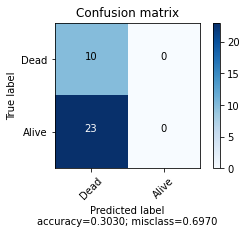

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is  [0.3030303 0.       ]
Recall  score is  [1. 0.]
Accuracy score is  0.30303030303030304
______________________________________




Συνολικός χρόνος fit και predict: 0.49089908599853516 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.70      1.00      0.82        23

    accuracy                           0.70        33
   macro avg       0.35      0.50      0.41        33
weighted avg       0.49      0.70      0.57        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('dummy', DummyClassifier(constant=1, strategy='constant'))])
{'pca__n_components': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


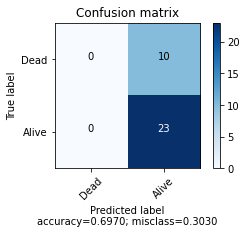

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is  [0.        0.6969697]
Recall  score is  [0. 1.]
Accuracy score is  0.696969696969697
______________________________________




Συνολικός χρόνος fit και predict: 0.5018107891082764 seconds
              precision    recall  f1-score   support

           0       0.30      1.00      0.47        10
           1       0.00      0.00      0.00        23

    accuracy                           0.30        33
   macro avg       0.15      0.50      0.23        33
weighted avg       0.09      0.30      0.14        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('dummy', DummyClassifier(strategy='most_frequent'))])
{'pca__n_components': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


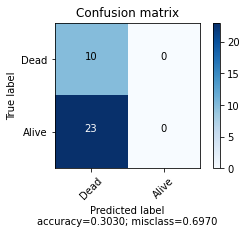

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is  [0.3030303 0.       ]
Recall  score is  [1. 0.]
Accuracy score is  0.30303030303030304
______________________________________




Συνολικός χρόνος fit και predict: 0.49752306938171387 seconds
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.80      0.70      0.74        23

    accuracy                           0.67        33
   macro avg       0.63      0.65      0.63        33
weighted avg       0.70      0.67      0.68        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=14)),
                ('dummy', DummyClassifier(strategy='stratified'))])
{'pca__n_components': 14}


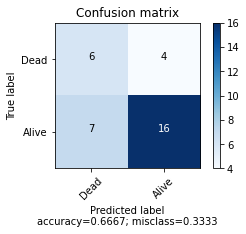

Precision score is  [0.46153846 0.8       ]
Recall  score is  [0.6        0.69565217]
Accuracy score is  0.6666666666666666


In [ ]:
pca = PCA()
ros = RandomOverSampler()

grid_params = {
    'pca__n_components': n_components, 
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_uniform)]

best_parameters(steps,grid_params,10,'f1_macro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_constant_0)]

best_parameters(steps,grid_params,10,'f1_macro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_constant_1)]

best_parameters(steps,grid_params,10,'f1_macro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_most_frequent)]

best_parameters(steps,grid_params,10,'f1_macro',over_train,over_train_labels,test,test_labels)

print('______________________________________\n\n\n\n')


steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_stratified)]

best_parameters(steps,grid_params,10,'f1_macro',over_train,over_train_labels,test,test_labels)

Συνολικός χρόνος fit και predict: 1.4256680011749268 seconds
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.87      0.87      0.87        23

    accuracy                           0.82        33
   macro avg       0.78      0.78      0.78        33
weighted avg       0.82      0.82      0.82        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=5)),
                ('gnb', GaussianNB())])
{'gnb__var_smoothing': 1e-09, 'pca__n_components': 5}


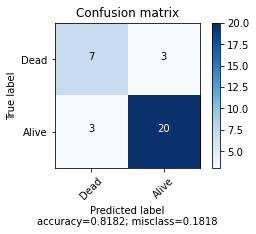

Precision score is  [0.7        0.86956522]
Recall  score is  [0.7        0.86956522]
Accuracy score is  0.8181818181818182


In [ ]:
smooth = [1e-9,1e-6,1e-3]
pca = PCA()
clf = GaussianNB()
ros = RandomOverSampler()

grid_params = {
    'pca__n_components': n_components,
    'gnb__var_smoothing': smooth
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)]

best_parameters(steps,grid_params,10,'f1_macro',train,train_labels,test,test_labels)

Συνολικός χρόνος fit και predict: 117.48736429214478 seconds
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.75      0.78      0.77        23

    accuracy                           0.67        33
   macro avg       0.60      0.59      0.59        33
weighted avg       0.66      0.67      0.66        33

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('kNN',
                 KNeighborsClassifier(metric='chebyshev', n_jobs=-1,
                                      n_neighbors=1))])
{'kNN__metric': 'chebyshev', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 14}


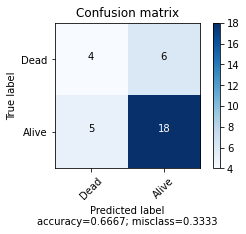

Precision score is  [0.44444444 0.75      ]
Recall  score is  [0.4       0.7826087]
Accuracy score is  0.6666666666666666


In [ ]:
k = [1, 3, 5, 7, 9]
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)
ros = RandomOverSampler()
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','minkowski']

grid_params = {
    'pca__n_components': n_components,
    'kNN__n_neighbors': k,
    'kNN__weights': weights,
    'kNN__metric': metric
}

steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)]

best_parameters(steps,grid_params,10,'f1_macro',train,train_labels,test,test_labels)

Optimize F1_micro score:



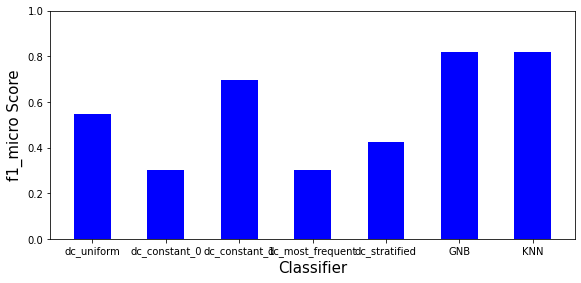

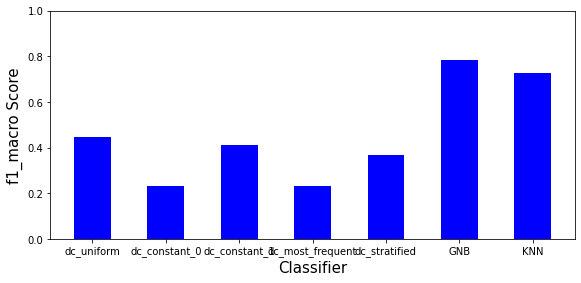

___________________________________________________________




Optimize F1_macro score:



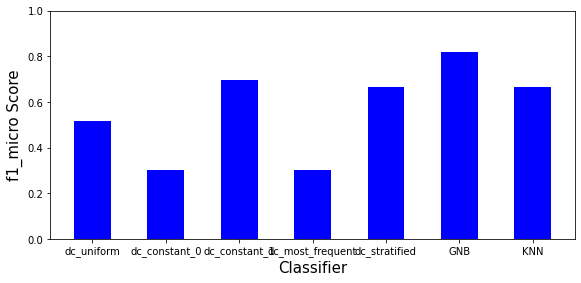

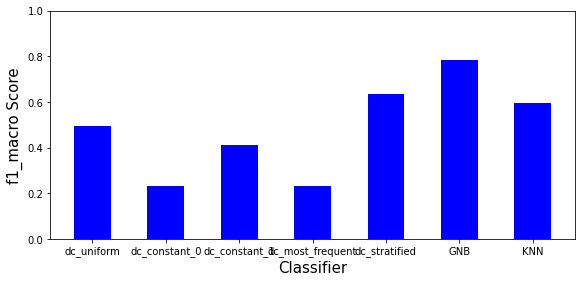

In [ ]:
clf = ['dc_uniform','dc_constant_0','dc_constant_1','dc_most_frequent','dc_stratified','GNB','KNN']

print('Optimize F1_micro score:\n')
plot_scores(clf,f1_micro[0:7],'f1_micro')
plot_scores(clf,f1_macro[0:7],'f1_macro')
print('___________________________________________________________\n\n\n\n')

print('Optimize F1_macro score:\n')
plot_scores(clf,f1_micro[7:14],'f1_micro')
plot_scores(clf,f1_macro[7:14],'f1_macro')

####Συμπέρασμα:
Απόό τα παραπάνω γραφήματα βλέπουμε ότι οι αποδόσεις των dummy classifiers δεν άλλαξαν καθόλου πράγμα αναμενόμενο αφού δεν χρησιμοποιούν τα δεδομένα που παρέχονται από το dataset αλλά κοιτούν μόνο τα labels αυτού. Παρ' όλα αυτά βλέπουμε σημαντική βελτίωση τόσο στον gnb όσο και στον knn. Ο gnb βελτιώθηκε χάρη στο preproccessing του dataset, ενώ ο knn χρησιμοποίησε και την υπερπαράμετρο των k neighbours.